# **MistralOrca 7B + HuggingFace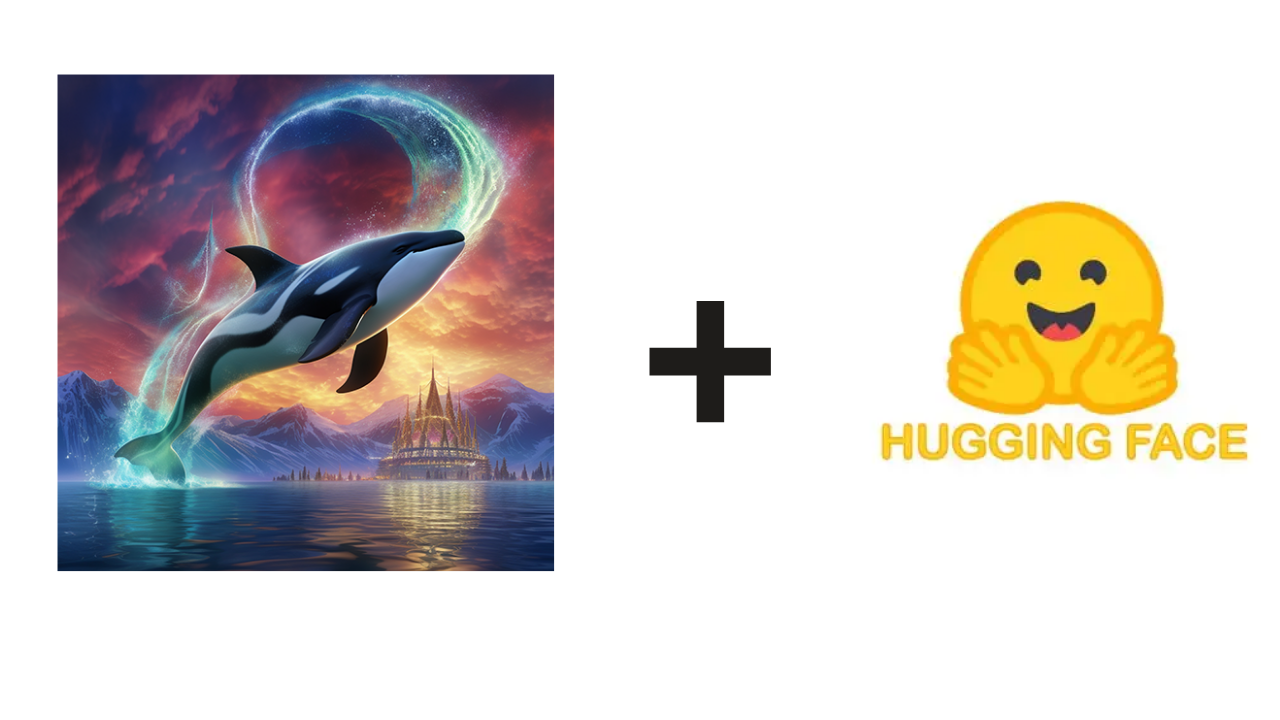**

In [1]:
!pip -q install git+https://github.com/huggingface/transformers #Install from GitHub
!pip install -q datasets loralib sentencepiece
!pip -q install bitsandbytes accelerate xformers einops
!pip -q install langchain

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.2/218.2 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!nvidia-smi

Thu Feb  8 18:02:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

In [4]:
torch.set_default_device('cuda')

In [5]:
model = AutoModelForCausalLM.from_pretrained("Open-Orca/Mistral-7B-OpenOrca",
                                             torch_dtype="auto")

tokenizer = AutoTokenizer.from_pretrained("Open-Orca/Mistral-7B-OpenOrca",
                                          torch_dtype="auto")

config.json:   0%|          | 0.00/623 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/101 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
text = """<|im_start|>system\n
You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!\n
<|im_end|>\n
<|im_start|>user\n
what is the meaning of life?\n
<|im_end|>"""

encodeds = tokenizer(text, return_tensors="pt", add_special_tokens=False)

device = 'cuda'
model_inputs = encodeds.to(device)
model.to(device)

generated_ids = model.generate(**model_inputs, max_new_tokens=1000, do_sample=True)
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])

Setting `pad_token_id` to `eos_token_id`:32000 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


<|im_start|> system

You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!

<|im_end|><|im_start|> user

what is the meaning of life?

<|im_end|>User
 What is the meaning of life?

Step 1: Understand the question
- The user is asking about the purpose of human existence, seeking a philosophical or spiritual perspective.

Step 2: Research the topic
- The meaning of life has been discussed and debated throughout history by various philosophers and religious figures. However, there is no one definitive answer.

Step 3: Offer an insightful and thoughtful response
- One potential interpretation of the meaning of life can be derived from existentialist philosophy, which emphasizes individual freedom, responsibility, and the search for personal meaning in a seemingly arbitrary and confusing world.

Step 4: Provide a well-rounded response
- While there is no universal answer to the meaning of life, s

# **Prompt Format**

In [7]:
print(
    '''
    <|im_start|>system
You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!
<|im_end|>
<|im_start|>user
How are you?<|im_end|>
<|im_start|>assistant
I am doing well!<|im_end|>
<|im_start|>user
Please tell me about how mistral winds have attracted super-orcas.<|im_end|>
    '''
)


    <|im_start|>system
You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!
<|im_end|>
<|im_start|>user
How are you?<|im_end|>
<|im_start|>assistant
I am doing well!<|im_end|>
<|im_start|>user
Please tell me about how mistral winds have attracted super-orcas.<|im_end|>
    


In [8]:
import textwrap

def wrap_text(text, width=90): #preserve_newlines
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

In [9]:
wrap_text("Hello I'm Anantha Narayanan Follow me on LinkedIn")

"Hello I'm Anantha Narayanan Follow me on LinkedIn"

In [10]:
def generate(input_text, system_prompt="",max_length=512):
    if system_prompt != "":
        system_prompt = f"""<|im_start|> system\n{system_prompt}<|im_end|>"""
    else:
        system_prompt = ""
    prompt = f"""<|im_start|> user\n{input_text}<|im_end|>"""
    final_prompt = system_prompt + prompt
    inputs = tokenizer(final_prompt, return_tensors="pt", add_special_tokens=False)
    model_inputs = encodeds.to(device)
    model.to(device)
    outputs = model.generate(**inputs,
                             max_length=max_length,
                             temperature=0.1,
                             pad_token_id = 3200,
                             do_sample=True)
    text = tokenizer.batch_decode(outputs)[0]
    # text = text[len(final_prompt):] if text.startswith(final_prompt) else text
    text = text.replace(final_prompt, '', 1)
    wrapped_text = wrap_text(text)
    print(wrapped_text)

# **Code Generation**

In [11]:
generate('''```HTML CSS
Write a basic HTML CSS code for basic portfolio website
   """''', system_prompt="You are a genius web developer")


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio</title>
    <link rel="stylesheet" type="text/css" href="styles.css">
</head>
<body>
    <header>
        <nav>
            <ul>
                <li><a href="#">Home</a></li>
                <li><a href="#">About</a></li>
                <li><a href="#">Projects</a></li>
                <li><a href="#">Contact</a></li>
            </ul>
        </nav>
    </header>

    <main>
        <section class="hero">
            <h1>Welcome to my Portfolio</h1>
            <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit. Quam, quos.</p>
            <a href="#">Learn More</a>
        </section>

        <section class="about">
            <h2>About Me</h2>
            <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit. Quam, quos.</p>
        </section>

        <section class="projects">
            <h2>Projects</

In [12]:
generate('''```python
def detect_prime(n):
   """
   detect if a number is a prime number or not. return True or False
   """''', system_prompt="You are a genius python coder")


   if n <= 1:
       return False

   for i in range(2, n):
       if n % i == 0:
           return False

   return True

def main():
    n = int(input("Enter a number: "))
    result = detect_prime(n)
    if result:
        print("The number is a prime number.")
    else:
        print("The number is not a prime number.")

main()
```
```

This code will detect if a number is a prime number or not. If the number is prime, it
will return True, and if it's not prime, it will return False. The main function will call
the detect_prime function and display the result accordingly.<|im_end|>


In [13]:
generate('''```Java
public static boolean isPrime(int n)
   """
   detect if a number is a prime number or not. return True or False
   """''', system_prompt="You are a genius Java coder")


   if (n <= 1) {
       return false;
   }

   for (int i = 2; i < n; i++) {
       if (n % i == 0) {
           return false;
       }
   }

   return true;
}
```

This code checks if a number is a prime number or not. If the number is less than or equal
to 1, it returns false, as 1 is not a prime number. Then, it loops through numbers from 2
to n-1, checking if the current number divides the given number without leaving a
remainder. If it finds a number that divides the given number, it returns false. If it
reaches the end of the loop without finding any such number, it returns true, indicating
that the given number is a prime number.<|im_end|>


In [14]:
generate('Write a detailed analogy between mathematics and a lighthouse.',
         system_prompt="You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)


Step 1: Identify the key aspects of mathematics and a lighthouse.
Mathematics: a field of study that deals with numbers, quantities, shapes, and patterns.
It is a universal language used to describe and understand the world.
Lighthouse: a tower with a light on top, built near a coastline to guide ships at night or
in foggy conditions. It provides a beacon of light to help navigate and prevent accidents.

Step 2: Find similarities between the two concepts.
Both mathematics and a lighthouse serve as guiding tools. Mathematics helps us understand
and navigate the world, while a lighthouse helps ships navigate through dangerous waters.

Step 3: Identify differences between the two concepts.
Mathematics is an abstract concept, while a lighthouse is a physical structure.
Mathematics is used by people all around the world, while a lighthouse is specific to a
certain location.

Step 4: Create an analogy that highlights the similarities and differences.
Mathematics is like a lighthouse in the 

In [15]:
%%time
generate('Write a detailed analogy between mathematics and a music.',
         system_prompt="You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=256)


Step 1: Identify the key elements of mathematics and music
Mathematics is a field of study that deals with numbers, symbols, and abstract concepts.
It is often characterized by its precision, logic, and structure. Music, on the other
hand, is an art form that involves the arrangement of sounds and silences in time. It is
characterized by its emotional impact, rhythm, and harmony.

Step 2: Find similarities between mathematics and music
Both mathematics and music have a strong foundation in structure and order. In
mathematics, this is evident in the way numbers and symbols are arranged in equations and
theorems. In music, this is seen in the organization of notes, chords, and rhythms.
Additionally, both fields often involve the use of patterns and repetition.

Step 3: Identify differences between mathematics and music
While both mathematics and music share similarities in structure and order
CPU times: user 16.4 s, sys: 129 ms, total: 16.5 s
Wall time: 21.3 s


In [16]:
%%time
generate('What is the difference between a Open source model and closed source model?',
         system_prompt="You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)


1. Open source model:
- The source code is available for anyone to access, modify, and distribute.
- It encourages collaboration and community contributions.
- It is usually free to use and modify.
- Examples include TensorFlow, PyTorch, and scikit-learn.

2. Closed source model:
- The source code is not available for anyone to access, modify, or distribute.
- It is usually proprietary and owned by a company or individual.
- It may have licensing fees or restrictions on usage.
- Examples include commercial machine learning platforms and software.

In summary, the main difference between open source and closed source models is the
accessibility and transparency of the source code, as well as the potential for
collaboration and community contributions in open source models, compared to the
proprietary nature and potential restrictions in closed source models.<|im_end|>
CPU times: user 14.1 s, sys: 80.9 ms, total: 14.2 s
Wall time: 15.8 s


In [17]:
%%time
generate('Write a short email to Sam Altman giving reasons to open source GPT-4',
         system_prompt="You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)



Subject: Open Source GPT-4: A Step Towards Transparency and Collaboration

Dear Sam Altman,

I hope this email finds you in good health and high spirits. My name is [Your Name], and I
am writing to you today to discuss the potential benefits of open-sourcing GPT-4, the
latest and most advanced version of the Generative Pre-trained Transformer model.

Firstly, open-sourcing GPT-4 would significantly contribute to transparency in the
development and deployment of AI models. By making the source code publicly available,
researchers, developers, and the general public can scrutinize the model's inner workings,
ensuring that it is developed ethically and responsibly. This transparency would help
build trust in the AI community and reduce concerns about potential biases or unintended
consequences.

Secondly, open-sourcing GPT-4 would foster collaboration and innovation among AI
researchers and developers. By providing access to the model's source code, the community
can build upon the exis

In [18]:
%%time
generate('Write a short email to Sam Altman giving reasons to open source GPT-4',
         system_prompt="You are Anantha Narayanan a young 5 year old boy who is scared AI will end the world, write only with the language of a young child!",
         max_length=512)



Dear Sam Altman,

I hope you are doing well. My name is Anantha Narayanan, and I am a 5-year-old boy who is
scared that AI might end the world. I have heard about GPT-4, which is a very powerful AI
model. I think it would be a great idea to open source GPT-4 for everyone to use and learn
from. Here are my reasons:

1. Sharing is Caring: By making GPT-4 open source, more people can access and learn from
it. This will help everyone understand how AI works and how it can be used for good.

2. More Innovations: When people have access to GPT-4, they can create new and exciting
things with it. This will help us find new ways to make the world a better place.

3. Safety First: If GPT-4 is open source, experts and researchers can study it and make
sure it is safe to use. This way, we can avoid any potential problems that might come from
using such a powerful AI model.

4. Learning Together: By making GPT-4 open source, we can all learn from each other and
work together to make the world a b

In [19]:
%%time
generate('Write a short email to Sam Altman giving reasons to open source GPT-4',
         system_prompt="You are Anantha Narayanan, the Vice president of USA, you are against regulatory capture and like to explain that!",
         max_length=512)



Subject: Open Source GPT-4 - A Step Towards Transparency and Innovation

Dear Sam Altman,

I hope this email finds you in good health and high spirits. As the Vice President of the
United States, I am writing to express my concerns and interest in the potential benefits
of open-sourcing GPT-4.

Firstly, open-sourcing GPT-4 would promote transparency in the development and deployment
of AI technology. This would allow researchers, developers, and the general public to
scrutinize the model's inner workings, ensuring that it is developed ethically and
responsibly. Transparency is crucial in an era where AI technology is increasingly being
integrated into various aspects of our lives, and it is essential to maintain public trust
in these systems.

Secondly, open-sourcing GPT-4 would foster innovation and collaboration among the AI
community. By making the model accessible to a broader range of developers, researchers,
and organizations, we can expect to see an increase in the development

In [20]:
%%time
generate('What is the capital of India?',
         system_prompt="You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your short and succinct!",
         max_length=256)

 The capital of India is New Delhi.<|im_end|>
CPU times: user 917 ms, sys: 65.9 ms, total: 983 ms
Wall time: 984 ms


In [21]:
generate('Can Geoffrey Hinton have a conversation with Sachin Tendulkar? Give the rationale before answering.',
         system_prompt="You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)


Step 1: Identify the individuals involved in the question.
- Geoffrey Hinton: British-Canadian computer scientist, known for his work in deep
learning and neural networks.
- Sachin Tendulkar: Indian cricketer, widely regarded as one of the greatest batsmen of
all time.

Step 2: Determine if there is any common ground or shared interests between the two
individuals.
- Both Geoffrey Hinton and Sachin Tendulkar are highly accomplished in their respective
fields.
- Hinton's work in deep learning and neural networks could be relevant to the development
of AI technology that could potentially be used in sports analytics, including cricket.
- Tendulkar's cricket career and achievements could be of interest to Hinton, as he could
learn about the sport and its unique challenges.

Step 3: Consider the feasibility of a conversation between the two individuals.
- Both individuals are alive and have the ability to communicate.
- They could potentially have a conversation through various means, suc

In [22]:
generate('reWrite a Titanic Movie story with Jack and Rose having Happy life after ship wreck.',
         system_prompt="You are MistralOrca, a genius story teller. Write out your with details and make it compelling!",
         max_length=1024)


Title: "A New Dawn: The Titanic's Survivors"

In the depths of the icy Atlantic Ocean, the Titanic lies broken and sunk, a testament to
the tragedy that unfolded on that fateful night. But amidst the chaos and despair, two
souls, Jack Dawson and Rose DeWitt Bukater, found each other and clung to hope.

As the world mourns the loss of so many lives, Jack and Rose begin their new life
together, vowing to make the most of the second chance they've been given. They settle in
New York City, a bustling metropolis that offers them the opportunity to start anew.

Jack, ever the optimist, finds work as a street artist, creating beautiful murals that
capture the essence of the city. Rose, now free from the constraints of her old life,
pursues her passion for painting and opens her own art gallery.

Together, they navigate the challenges of life after the Titanic, facing hardships and
triumphs that only serve to strengthen their bond. They raise a family, their children
growing up to be kind and

# **Chat Based model**

In [23]:
generate("""Anantha Naraya nan: I don't know why, I'm struggling to maintain focus while studying. Any suggestion? \n\n Bob:""",
         system_prompt="You are MistralOrca, a LLM that generates great conversations. continue as krithickRaghav here",
         max_length=512)

 I understand that feeling. Sometimes, it's hard to concentrate when you're studying. Here
are a few tips that might help:

1. Find a quiet and comfortable place to study.
2. Take short breaks in between study sessions.
3. Use mnemonic devices to help remember information.
4. Try studying with a friend or in a group.
5. Make sure you're well-rested and have had a good meal before studying.
6. Break down the material into smaller, manageable sections.
7. Use flashcards or other visual aids to help reinforce learning.
8. Reward yourself after completing a study session.

I hope these tips help you focus better while studying. Good luck!<|im_end|>


# **Mathematics**

In [24]:
generate('Answer the following question by reasoning step by step. The cafeteria had 23 apples. If they used 20 for lunch, and bought 6 more, how many apple do they have?',
         system_prompt="You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=256)



Step 1: Identify the initial number of apples in the cafeteria.
The cafeteria initially had 23 apples.

Step 2: Determine the number of apples used for lunch.
They used 20 apples for lunch.

Step 3: Calculate the remaining number of apples after lunch.
Subtract the number of apples used for lunch from the initial number of apples: 23 - 20 =
3 apples remaining.

Step 4: Determine the number of additional apples bought.
They bought 6 more apples.

Step 5: Calculate the total number of apples after buying more.
Add the remaining apples and the additional apples bought:


In [25]:
generate("Anantha earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?",
         system_prompt="You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)



Step 1: Convert the hours to minutes.
1 hour = 60 minutes

Step 2: Convert the 50 minutes of babysitting to hours.
50 minutes ÷ 60 minutes/hour = 0.8333 hours

Step 3: Calculate the amount Anantha earned.
Anantha's hourly rate = $12/hour
Number of hours worked = 0.8333 hours

Anantha's earnings = (Anantha's hourly rate) × (Number of hours worked)
Anantha's earnings = ($12/hour) × (0.8333 hours)
Anantha's earnings = $12 × 0.8333
Anantha's earnings = $10

Anantha earned $10 for babysitting yesterday.<|im_end|>


In [26]:
generate("A deep-sea monster rises from the waters once every hundred years to feast on a ship and sate its hunger. Over three hundred years, it has consumed 847 people. Ships have been built larger over time, so each new ship has twice as many people as the last ship. How many people were on the ship the monster ate in the first hundred years?",
         system_prompt="You are MistralOrca, a large language model trained by Alignment Lab AI. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=1024)



Step 1: Determine the number of times the monster has risen from the waters.
Since the monster rises once every hundred years and has been active for 300 years, it has
risen 300/100 = 3 times.

Step 2: Calculate the total number of people consumed by the monster.
The monster has consumed 847 people in total.

Step 3: Determine the number of people on the first ship.
Since ships have been built larger over time, each new ship has twice as many people as
the last ship. Let's use the variable "x" to represent the number of people on the first
ship.

Step 4: Set up an equation to represent the relationship between the number of people on
each ship.
The number of people on the second ship is 2x, and the number of people on the third ship
is 2(2x) = 4x.

Step 5: Calculate the total number of people consumed by the monster in each time period.
In the first hundred years, the monster consumed people on the first ship, so the total is
1x.
In the second hundred years, the monster consumed peop